# Guiding questions

How does graduate student gender diversity at Columbia compare to its peer institutions?

In [2]:
from collections import defaultdict
import math
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
TOTALS = pickle.load(open('../../../data/Detailed_Sex_RaceEthnicity_Graduates.p', 'rb'))
SE_TOTALS = pickle.load(open('../../../data/SE-Detailed_Sex.p', 'rb'))

years = sorted(TOTALS.keys())
institutions = sorted(TOTALS[ max(years) ].keys())
fields = sorted(TOTALS[ max(years) ]['Columbia University in the City of New York'].keys())

print(f'Data set describes years {min(years)} - {max(years)} for the following institutions: {institutions}.')

Data set describes years 1994 - 2016 for the following institutions: ['Brown University', 'Columbia University in the City of New York', 'Cornell University', 'Dartmouth College', 'Duke University', 'Harvard University', 'Massachusetts Institute of Technology', 'Princeton University', 'Stanford University', 'University of Pennsylvania', 'Yale University'].


In [48]:
fields = {
    'Science': set(),
    'Engineering': set()
}
for year in years:
    for inst in institutions:
        inst_stats = SE_TOTALS[year][inst]
        for seh in inst_stats.keys():
            for field in inst_stats[seh].keys():
                fields[seh].add(field)

In [51]:
def get_proportions(seh, field, inst):
    proportions = []
    for year in years:
        stats = SE_TOTALS[year][inst][seh].get(field, None)
        if stats is None:
            proportions.append(None)
        else:
            proportions.append(stats['Female'] / stats['Total for selected values'])
    return proportions

def plot_inst(ax, seh, field, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst == highlight:
            continue
        ax.plot(years, get_proportions(seh, field, inst), label=inst)
    ax.plot(years, get_proportions(seh, field, highlight), label=highlight, linewidth=3, color='black')
    
    ax.set_ylabel('Percent female')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(f'{field}: Comparing Columbia\'s peers')
    
    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    
def plot_field(ax, seh, field, inst='Columbia University in the City of New York'):
    ax.plot(years, get_proportions(seh, field, inst))
    ax.set_ylim(top=1, bottom=0)

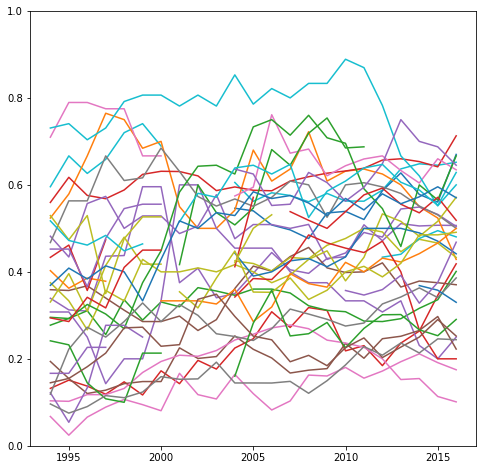

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))
for seh, fields in fields.items():
    for field in fields:
        plot_field(ax, seh, field)

In [16]:
# Convenient function for making subplots for every institution
def subplots(num=len(institutions), cols=2, figsize=8):
    rows = math.ceil(num / cols)
    return plt.subplots(rows, cols, figsize=(figsize * cols, figsize * rows))

# Returns female proportions for an institution in a field
def get_proportions(field, inst='Columbia University in the City of New York'):
    proportions = []
    for year in years:
        field_stats = TOTALS[year][inst].get(field, None)
        if field_stats is None:
            proportions.append(None)
        else:
            fem_count = field_stats.get('Female', 0)
            if isinstance(fem_count, dict):
                fem_count = fem_count['Total for selected values']
                
            proportions.append(
                fem_count /
                    field_stats['Total for selected values']['Total for selected values']
            )
    return proportions

# Plots female proportions for every institution for a field, highlighting one, in a line graph
def plot_inst(ax, field, highlight='Columbia University in the City of New York'):
    for inst in institutions:
        if inst == highlight:
            continue
        ax.plot(years, get_proportions(inst, field), label=inst)
    ax.plot(years, get_proportions(highlight, field), label=highlight, linewidth=3, color='black')
    
    ax.set_ylabel('Percent female')
    ax.legend()
    ax.set_ylim(top=1, bottom=0)
    ax.set_title(f'{field}: Comparing Columbia\'s peers')
    
    # Format y tick labels to be percentages
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

# Returns female and male headcounts for a field in an institution
def get_counts(field, inst='Columbia University in the City of New York'):
    females = []
    males = []
    for year in years:
        stats = TOTALS[year][inst].get(field, None)
        if stats is None:
            females.append(0)
            males.append(0)
            continue
        females.append(stats['Female']['Total for selected values'])
        males.append(stats['Male']['Total for selected values'])
    return females, males

# Plots a female and male headcounts line graph for a field in an institution
def plot_counts(ax, field, inst='Columbia University in the City of New York'):
    females, males = get_counts(field, inst)
    ax.plot(years, females, label='Female')
    ax.plot(years, males, label='Male')
    ax.legend()
    ax.set_title(f'{field}: Columbia\'s headcounts by sex')
    ax.set_ylabel('Number of people')

# Plots a female vs. male connected scatter plot
def plot_connected(ax, field, inst='Columbia University in the City of New York'):
    females, males = get_counts(field, inst)
    ax.plot(females, males, label=inst)
    # ax.scatter(females, males, c=[i for i in range(len(males))], cmap='viridis')
    
    for i in [0, -1]:
        ax.annotate(years[i], (females[i], males[i]))
    
    _, ymax = ax.get_ylim()
    _, xmax = ax.get_xlim()
    top = 500 #max(ymax, xmax)
    
    ax.set_ylim(bottom=0, top=top)
    ax.set_xlim(left=0, right=top)
    
    ax.plot([0, 1000], [0, 1000], color='gray', linestyle='--')

    ax.set_title(f'{field}: Columbia, men vs. women')
    ax.set_xlabel('Number of women')
    ax.set_ylabel('Number of men')
    ax.legend()

# Plots three specified plots for a field in a row of a subplots array
def plot_triplet(axArr, index, field):
    plot_inst(axArr[i, 0], field)
    plot_counts(axArr[i, 1], field)
    plot_connected(axArr[i, 2], field)

# Plots triplets for every institution
def plot_all():
    fig, axArr = subplots(len(fields)*3, cols=3)
    for i, field in enumerate(fields):
        plot_triplet(axArr, i, field)
    fig.tight_layout()

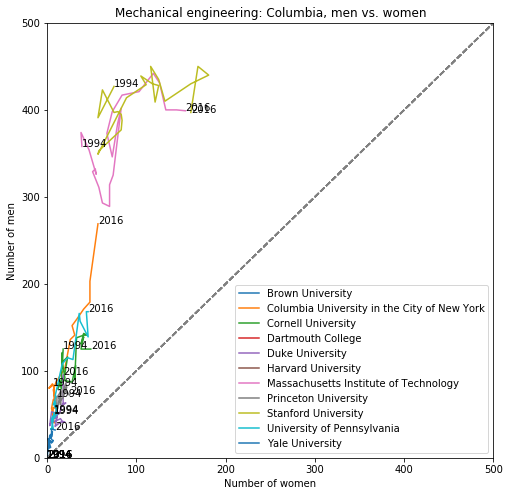

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
for inst in institutions:
    plot_connected(ax, 'Mechanical engineering', inst)

In [39]:
print('mechanical_engineering: {')
for inst in institutions:
    print(f'  \'{inst}\': ' + str([list(x) for x in zip(*get_counts('Mechanical engineering', inst=inst))]).replace('None', 'null') + ',')
print('}')

mechanical_engineering: {
  'Brown University': [[null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null], [null, null]],
  'Columbia University in the City of New York': [[6, 83], [2, 80], [6, 85], [8, 82], [8, 67], [7, 67], [5, 57], [8, 40], [6, 45], [7, 58], [11, 56], [9, 66], [7, 78], [10, 87], [20, 103], [26, 136], [31, 141], [28, 152], [33, 159], [41, 171], [48, 179], [48, 203], [57, 269]],
  'Cornell University': [[18, 125], [17, 103], [17, 121], [16, 79], [14, 88], [14, 89], [12, 79], [20, 97], [23, 116], [17, 110], [20, 92], [19, 89], [28, 87], [32, 106], [31, 90], [33, 138], [41, 141], [45, 141], [41, 143], [38, 131], [41, 139], [38, 125], [49, 125]],
  'Dartmouth College': [[null, null], [null, null], [null, null], [null, null], 

In [40]:
print("mechanical_engineering: {")
for inst in institutions:
    print(f'  \'{inst}\': ' + str(get_proportions('Mechanical engineering', inst)).replace('None', 'null') + ",")
print('}')

mechanical engineering': {
  'Brown University': [null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null, null],
  'Columbia University in the City of New York': [0.06741573033707865, 0.024390243902439025, 0.06593406593406594, 0.08888888888888889, 0.10666666666666667, 0.0945945945945946, 0.08064516129032258, 0.16666666666666666, 0.11764705882352941, 0.1076923076923077, 0.16417910447761194, 0.12, 0.08235294117647059, 0.10309278350515463, 0.16260162601626016, 0.16049382716049382, 0.18023255813953487, 0.15555555555555556, 0.171875, 0.19339622641509435, 0.21145374449339208, 0.19123505976095617, 0.17484662576687116],
  'Cornell University': [0.1258741258741259, 0.14166666666666666, 0.12318840579710146, 0.16842105263157894, 0.13725490196078433, 0.13592233009708737, 0.13186813186813187, 0.17094017094017094, 0.16546762589928057, 0.13385826771653545, 0.17857142857142858, 0.17592592592592593, 0.24347826086956523, 0.23188

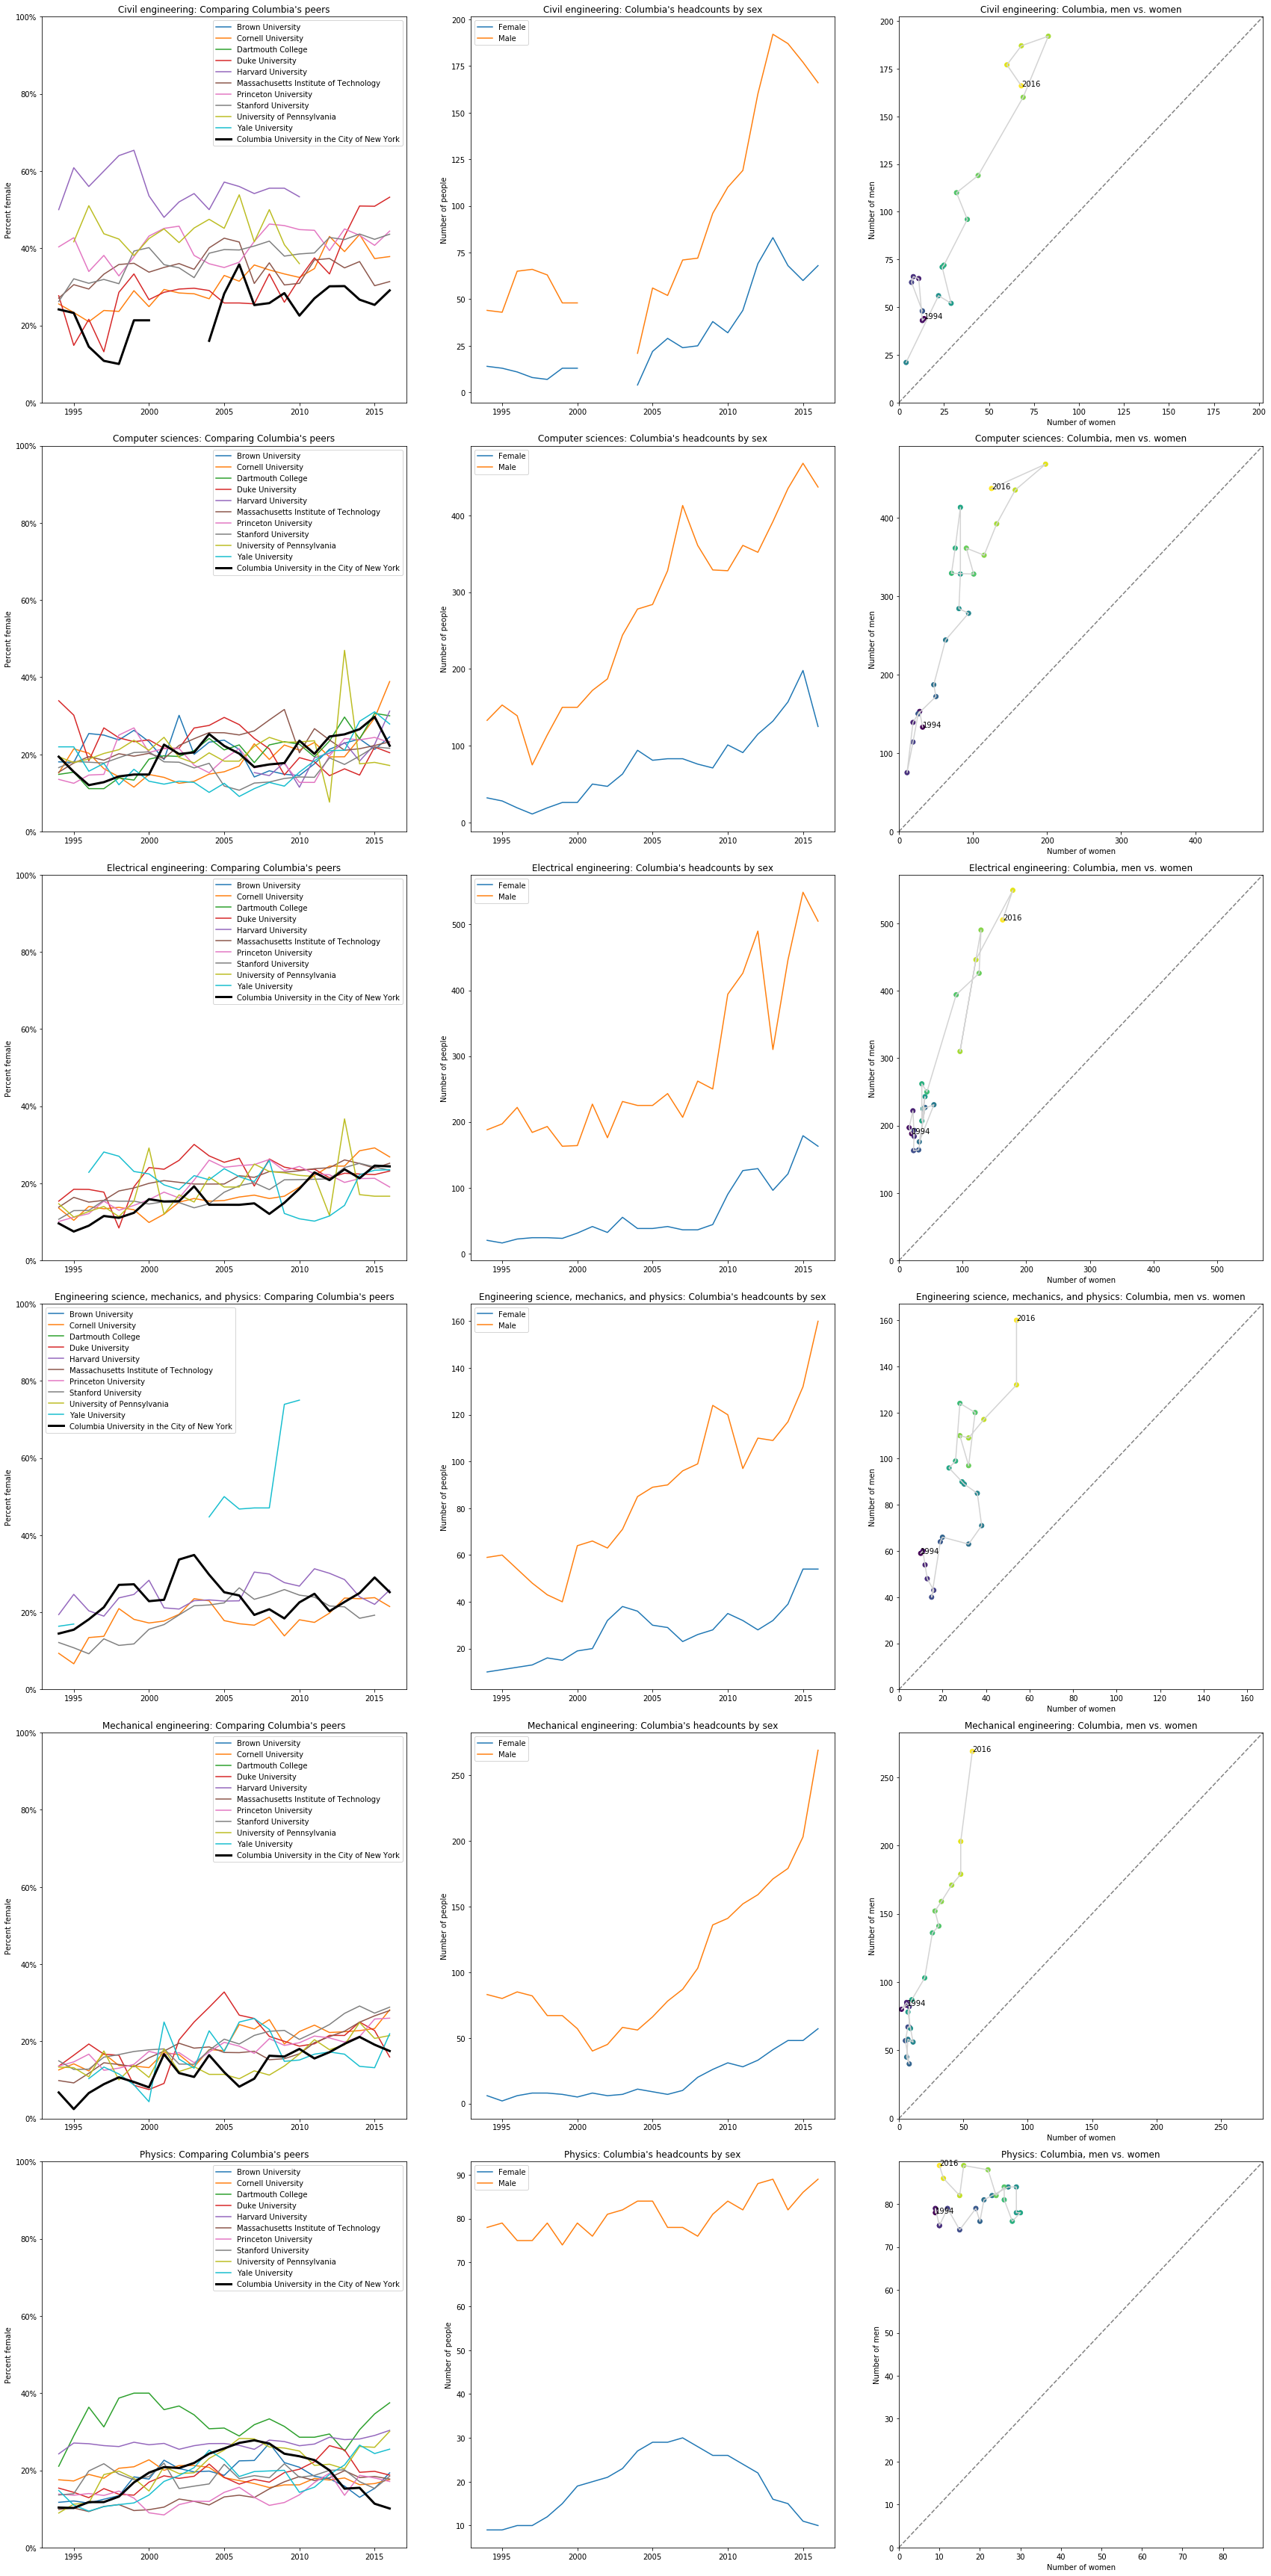

In [40]:
selected_fields = [
    'Civil engineering',
    'Computer sciences',
    'Electrical engineering',
    'Engineering science, mechanics, and physics',
    'Mechanical engineering',
    'Physics',
]

fig, axArr = subplots(len(selected_fields)*3, cols=3)
for i, field in enumerate(selected_fields):
    plot_triplet(axArr, i, field)
fig.tight_layout()

# fig.savefig('../../../img/graduates_sex_detailed_comparison_triplet.png')